#datasets

##Installing the packages

In [143]:
pip install pandas geopandas requests matplotlib --quiet

In [144]:
import json
import requests
import pandas as pd
import geopandas as gpd

In [145]:
with open('/content/drive/MyDrive/LCWIP_database.json','r') as f: #reading the lcwip database
  lcwip_data = json.load(f)
  lcwip_df = pd.DataFrame(lcwip_data)

##Loading the dataset

In [146]:
df_org = lcwip_df

In [147]:
lcwip_df.columns

Index(['pdf_url', 'date_published', 'mentions_pct', 'report_name',
       'other_tools_used', 'how_pct_was_used', 'other_tools_developed',
       'specific_evidence_of_impact_of_using_pct', 'quotes_on_using_pct',
       'local_authority_name', 'combined_authority_name',
       'length_of_cycle_network_proposed', 'total_cost_of_network',
       'specific_evidence_of_impact',
       'mentions_pct_or_propensity_cycling_tool',
       'length_of_cycle_network_proposed_km'],
      dtype='object')

In [148]:
lcwip_df.head()

,pdf_url,date_published,mentions_pct,report_name,other_tools_used,how_pct_was_used,other_tools_developed,specific_evidence_of_impact_of_using_pct,quotes_on_using_pct,local_authority_name,combined_authority_name,length_of_cycle_network_proposed,total_cost_of_network,specific_evidence_of_impact,mentions_pct_or_propensity_cycling_tool,length_of_cycle_network_proposed_km
0,https://api.liverpoolcityregion-ca.gov.uk/wp-c...,September 2023,True,Liverpool City Region Local Cycling and Walkin...,None,The PCT was used to identify existing patterns...,A specific 'Walking Audit Methodology for Live...,The PCT analysis was used to provide evidence ...,None,Liverpool City Region Combined Authority (LCRC...,Liverpool City Region Combined Authority,Up to 600km of cycling and walking routes are ...,The total cost for the 10-year proposals is ex...,NaN,NaN,NaN
1,https://edemocracy.northyorks.gov.uk/documents...,24 January 2025,True,Ripon and Catterick Phase 1 LCWIPs,None,The Propensity to Cycle Tool (PCT) was used to...,None,The PCT outputs provided evidence to support t...,None,North Yorkshire Council (for Ripon),York and North Yorkshire Combined Authority,A total network length is not specified. The p...,A total network cost is not provided. The plan...,NaN,NaN,NaN
2,https://edemocracy.northyorks.gov.uk/documents...,24 January 2025,True,Ripon and Catterick Phase 1 LCWIPs,None,The Propensity to Cycle Tool (PCT) was used to...,None,The PCT outputs provided evidence to support t...,None,North Yorkshire Council (for Catterick),York and North Yorkshire Combined Authority,A total network length is not specified. The p...,A total network cost is not provided. The plan...,NaN,NaN,NaN
3,https://www.cheshirewestandchester.gov.uk/asse...,2020,True,Cheshire West and Chester Council Local Cyclin...,None,The tool was used during the network planning ...,None,The analysis from the Propensity to Cycle Tool...,None,Cheshire West and Chester Council [3],None,Not specified in document,Not specified in document,NaN,NaN,NaN
4,https://www.rutland.gov.uk/sites/default/files...,August 2023,True,Rutland County Council Local Cycling and Walki...,None,The Propensity to Cycle Tool (PCT) was used to...,None,The PCT analysis identified a clear 'spoke' pa...,None,Rutland County Council,None,Not specified in document,"£35,582,560",NaN,NaN,NaN


In [149]:
lcwip_df['combined_authority_name'].isna().sum()


np.int64(80)

In [150]:
lcwip_df['combined_authority_name'].notna()

,combined_authority_name
0,True
1,True
2,True
3,False
4,False
...,...
99,False
100,False
101,False
102,False


In [151]:
lcwip_df_final = lcwip_df[lcwip_df['combined_authority_name'].notna()]

In [152]:
print('LCWIP Database loaded successfully.')
print(f'Found {len(lcwip_df_final)} reports.') #checking the number of reports found in the database

LCWIP Database loaded successfully.
Found 24 reports.


In [153]:
# Display the first few rows of the df table to check
print("\nLCWIP DataFrame Head:")
print(lcwip_df_final.head())


LCWIP DataFrame Head:
                                              pdf_url    date_published  \
0   https://api.liverpoolcityregion-ca.gov.uk/wp-c...    September 2023   
1   https://edemocracy.northyorks.gov.uk/documents...   24 January 2025   
2   https://edemocracy.northyorks.gov.uk/documents...   24 January 2025   
6   https://democracy.york.gov.uk/documents/s18043...  December 4, 2024   
12  https://democracy.durham.gov.uk/documents/s145...      January 2021   

   mentions_pct                                        report_name  \
0          True  Liverpool City Region Local Cycling and Walkin...   
1          True                 Ripon and Catterick Phase 1 LCWIPs   
2          True                 Ripon and Catterick Phase 1 LCWIPs   
6          True  City of York Council Decision Report: Local Cy...   
12         True  Durham County Council LOCAL CYCLING AND WALKIN...   

   other_tools_used                                   how_pct_was_used  \
0              None  The PCT wa

In [154]:
#getting the GeoJSON data from the URL
CA_gjs_url = 'https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/CAUTH_MAY_2025_EN_BSC/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson'
#CA_gjs_url = 'https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/CTYUA_DEC_2024_UK_NC/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson'

In [155]:
#request getting the CA URL
try:
    response = requests.get(CA_gjs_url)
    response.raise_for_status()  # Raise an exception for bad status codes
    ca_geojson = response.json()
    # Load into a GeoDataFrame for spatial analysis
    ca_gdf = gpd.GeoDataFrame.from_features(ca_geojson['features'], crs="EPSG:4326")
    print("Combined Authorities GeoJSON loaded successfully.")
    print(f"Found {len(ca_gdf)} Combined Authorities.")

except requests.exceptions.RequestException as e:
    print(f"Error fetching GeoJSON: {e}")
    ca_gdf = None

Combined Authorities GeoJSON loaded successfully.
Found 15 Combined Authorities.


In [156]:
if ca_gdf is not None:
    print("\nCombined Authorities GeoDataFrame Head:")
    print(ca_gdf.head())


Combined Authorities GeoDataFrame Head:
                                            geometry  FID  CAUTH25CD  \
0  POLYGON ((-2.13413 53.68573, -2.12539 53.67484...    1  E47000001   
1  POLYGON ((-0.99046 53.66122, -0.99023 53.65898...    2  E47000002   
2  POLYGON ((-1.87872 53.96239, -1.87885 53.95425...    3  E47000003   
3  MULTIPOLYGON (((-2.62684 53.35464, -2.63147 53...    4  E47000004   
4  MULTIPOLYGON (((-1.24194 54.72272, -1.24252 54...    5  E47000006   

               CAUTH25NM   BNG_E   BNG_N      LONG        LAT   Shape__Area  \
0     Greater Manchester  377929  401095 -2.334239  53.506093  1.275867e+09   
1        South Yorkshire  441052  398663 -1.382848  53.483111  1.552193e+09   
2         West Yorkshire  418683  427238 -1.718223  53.741208  2.030623e+09   
3  Liverpool City Region  344345  390165 -2.838616  53.405369  7.263838e+08   
4            Tees Valley  436953  521739 -1.429689  54.589511  7.955595e+08   

   Shape__Length                              Globa

In [157]:
#cleaning the authority name from the LCWIP database to match the CA GJson
lcwip_df_final['clean_authority_name'] = lcwip_df_final['combined_authority_name'].str.split(' \[').str[0]

#name of the authority is in the 'CAUTH24NM' column of the GeoDataFrame
if ca_gdf is not None:
    ca_names = ca_gdf['CAUTH25NM'].unique().tolist()
ca_names

/tmp/ipython-input-3730151978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lcwip_df_final['clean_authority_name'] = lcwip_df_final['combined_authority_name'].str.split(' \[').str[0]


['Greater Manchester',
 'South Yorkshire',
 'West Yorkshire',
 'Liverpool City Region',
 'Tees Valley',
 'West Midlands',
 'Cambridgeshire and Peterborough',
 'West of England',
 'York and North Yorkshire',
 'East Midlands',
 'North East',
 'Devon and Torbay',
 'Hull and East Yorkshire',
 'Greater Lincolnshire',
 'Lancashire']

<Axes: >

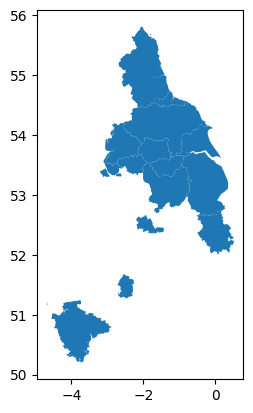

In [158]:
ca_gdf.plot()

In [159]:
lcwip_df_final['clean_authority_name'].unique()

array(['Liverpool City Region Combined Authority',
       'York and North Yorkshire Combined Authority',
       'North East Combined Authority',
       'West of England Combined Authority',
       'Cambridgeshire and Peterborough Combined Authority',
       'East Midlands Combined County Authority',
       'West Yorkshire Combined Authority'], dtype=object)

In [160]:
def find_ca(report_authority_name, ca_list):
    """Checks if any Combined Authority name is in the report's authority string."""
    for ca_name in ca_list:
        if ca_name in report_authority_name:
            return ca_name
    return None # Return None if no match is found

if ca_gdf is not None:
    # Create a new column in the LCWIP DataFrame to store the matched Combined Authority
    lcwip_df_final['matched_authority'] = lcwip_df_final['clean_authority_name'].apply(lambda x: find_ca(x, ca_names))

    # See how many reports were matched
    matched_reports = lcwip_df_final[lcwip_df_final['matched_authority'].notna()]
    print(f"\nSuccessfully matched {len(matched_reports)} reports to a Combined Authority.")
    print(matched_reports[['clean_authority_name', 'matched_authority']].head())


Successfully matched 24 reports to a Combined Authority.
                           clean_authority_name         matched_authority
0      Liverpool City Region Combined Authority     Liverpool City Region
1   York and North Yorkshire Combined Authority  York and North Yorkshire
2   York and North Yorkshire Combined Authority  York and North Yorkshire
6   York and North Yorkshire Combined Authority  York and North Yorkshire
12                North East Combined Authority                North East


/tmp/ipython-input-4083163492.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lcwip_df_final['matched_authority'] = lcwip_df_final['clean_authority_name'].apply(lambda x: find_ca(x, ca_names))


In [161]:
lcwip_df_final[['matched_authority','clean_authority_name']]

,matched_authority,clean_authority_name
0,Liverpool City Region,Liverpool City Region Combined Authority
1,York and North Yorkshire,York and North Yorkshire Combined Authority
2,York and North Yorkshire,York and North Yorkshire Combined Authority
6,York and North Yorkshire,York and North Yorkshire Combined Authority
12,North East,North East Combined Authority
13,West of England,West of England Combined Authority
15,North East,North East Combined Authority
17,Cambridgeshire and Peterborough,Cambridgeshire and Peterborough Combined Autho...
22,East Midlands,East Midlands Combined County Authority
25,York and North Yorkshire,York and North Yorkshire Combined Authority


In [162]:
# --- Perform Coverage Analysis ---
# Group by the 'clean_authority_name' column and count the number of reports
if ca_gdf is not None:
    ca_coverage = lcwip_df_final.groupby('matched_authority').size().reset_index(name='report_count')
    ca_coverage = ca_coverage.sort_values('report_count', ascending=False)

    print("\nLCWIP Report Count per Combined Authority")
    print(ca_coverage)




LCWIP Report Count per Combined Authority
                 matched_authority  report_count
6         York and North Yorkshire             7
3                       North East             5
4                   West Yorkshire             5
0  Cambridgeshire and Peterborough             3
2            Liverpool City Region             2
1                    East Midlands             1
5                  West of England             1


In [166]:
# --- Merge analysis results back into the GeoDataFrame for mapping ---
if ca_gdf is not None:
    # Merge the coverage count into the GeoDataFrame
    # We use a 'left' merge to keep all Combined Authorities, even those with no reports
    map_gdf = ca_gdf.merge(ca_coverage, left_on='CAUTH25NM', right_on='matched_authority', how='left')
    # Fill in 0 for CAs with no matched reports and ensure the count is an integer
    #map_gdf['report_count'] = ca_coverage['report_count'].fillna(0).astype(int)

    print("\nData prepared for mapping:")
    print(map_gdf[['CAUTH25NM', 'report_count']].head(10))


Data prepared for mapping:
                         CAUTH25NM  report_count
0               Greater Manchester           NaN
1                  South Yorkshire           NaN
2                   West Yorkshire           5.0
3            Liverpool City Region           2.0
4                      Tees Valley           NaN
5                    West Midlands           NaN
6  Cambridgeshire and Peterborough           3.0
7                  West of England           1.0
8         York and North Yorkshire           7.0
9                    East Midlands           1.0


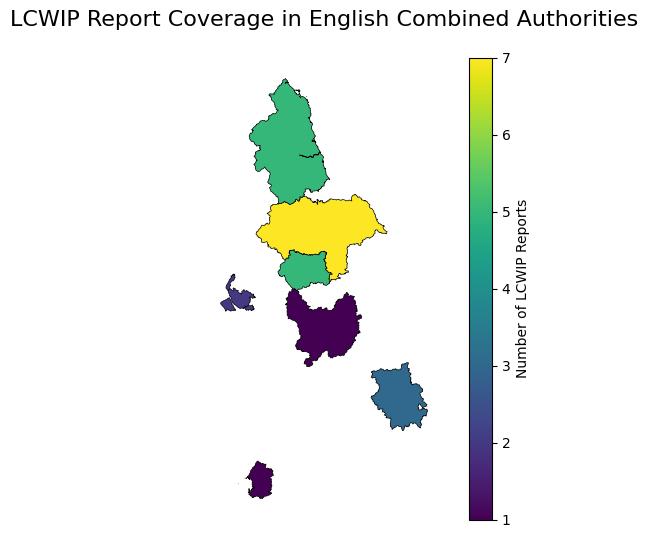

In [168]:
import matplotlib.pyplot as plt

if ca_gdf is not None:
    # --- Create the plot ---
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    # Plot the Combined Authority boundaries, with color intensity based on the report count
    map_gdf.plot(column='report_count',
                 ax=ax,
                 legend=True,
                 cmap='viridis', # Color map
                 edgecolor='black',
                 linewidth=0.5,
                 legend_kwds={'label': "Number of LCWIP Reports",
                              'orientation': "vertical"})

    # --- Customize and save the map ---
    ax.set_title('LCWIP Report Coverage in English Combined Authorities\n', fontdict={'fontsize': '16', 'fontweight': '3'})
    ax.set_axis_off() # Remove the x/y axes for a cleaner look